In [17]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import pandas as pd

In [5]:
pd.read_csv('data/sample_submission.csv').head(2)

,id,Target
0,1,0
1,2,0


In [7]:
raw_data = pd.read_csv('data/train.csv')

* id : 샘플 아이디
* Gender : 전복 성별
* Lenght : 전복 길이
* Diameter : 전복 둘레
* Height : 전복 키 
* Whole : Weight : 전복 전체 무게
* Shucked Weight : 껍질을 제외한 무게
* Viscra Weight : 내장 무게
* Shell Weight : 껍질 무게
* Target : 전복 나이

In [8]:
raw_data.head(2)

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.114,0.3925,0.291,0.3100,15
1,2,I,0.430,0.315,0.095,0.378,0.1750,0.080,0.1045,8


In [28]:
raw_data.dtypes

id                  int64
Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [29]:
raw_data.Gender.unique()

array(['M', 'I', 'F'], dtype=object)

In [9]:
raw_data.describe()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,627.000000,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,361.854252,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,1.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,314.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,627.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,940.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,1253.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fc6fa15c0>,
      dtype=object)

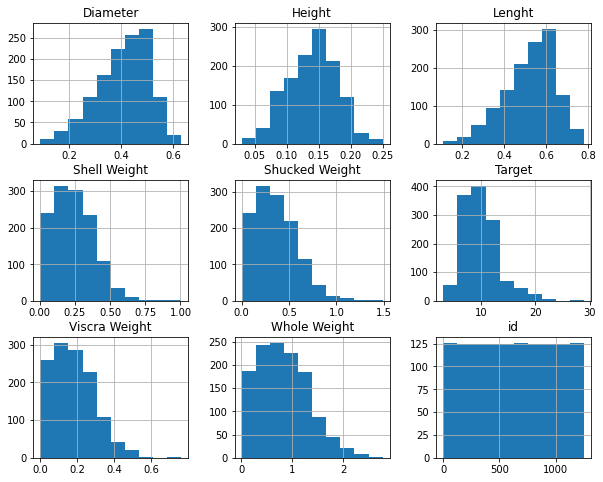

In [19]:
raw_data.hist(column=raw_data.columns, figsize=(10, 8))

In [22]:
raw_data.corr()[['Target']].sort_values('Target')

,Target
id,0.060358
Shucked Weight,0.420126
Viscra Weight,0.497283
Whole Weight,0.538404
Lenght,0.543789
Diameter,0.567933
Height,0.604654
Shell Weight,0.625819
Target,1.000000


In [24]:
raw_data.isnull().sum()

id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

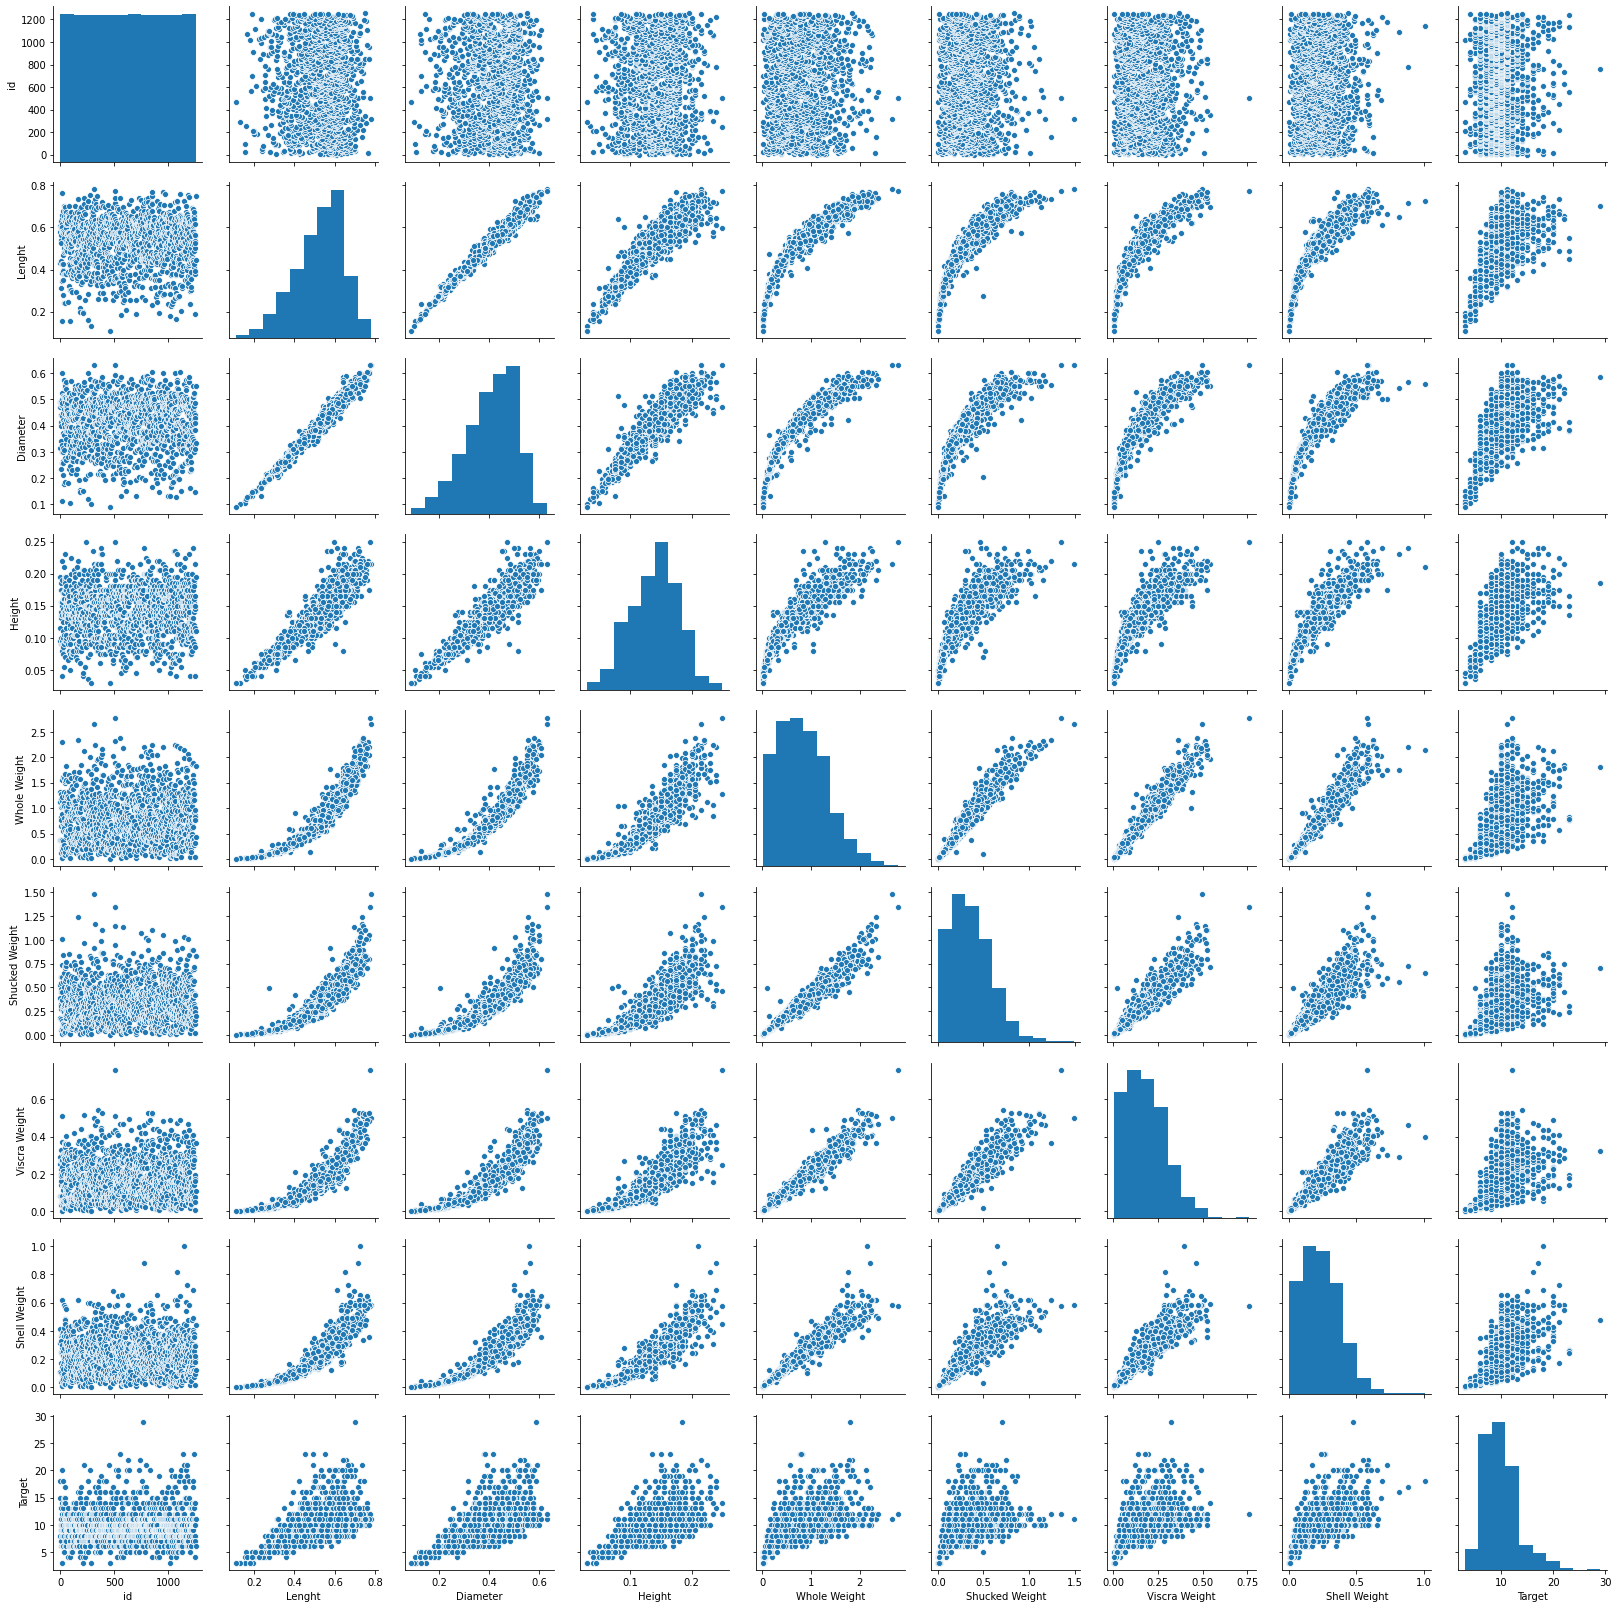

In [31]:
sns.pairplot(data=raw_data.drop(['Gender'], axis=1), )

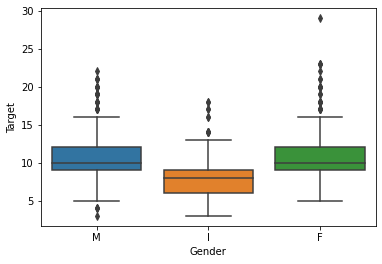

In [33]:
sns.boxplot(data=raw_data, y='Target', x='Gender')

In [38]:
md_data = raw_data.copy()
md_data = md_data.join(pd.get_dummies(raw_data['Gender'])).drop(['Gender'], axis=1)

In [43]:
md_data.head()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,F,I,M
0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0,0,1
1,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0,1,0
2,3,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0,1,0
3,4,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0,0,1
4,5,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0,1,0


In [46]:
# md_data.to_csv('data/train_data_hs.csv', index=False)

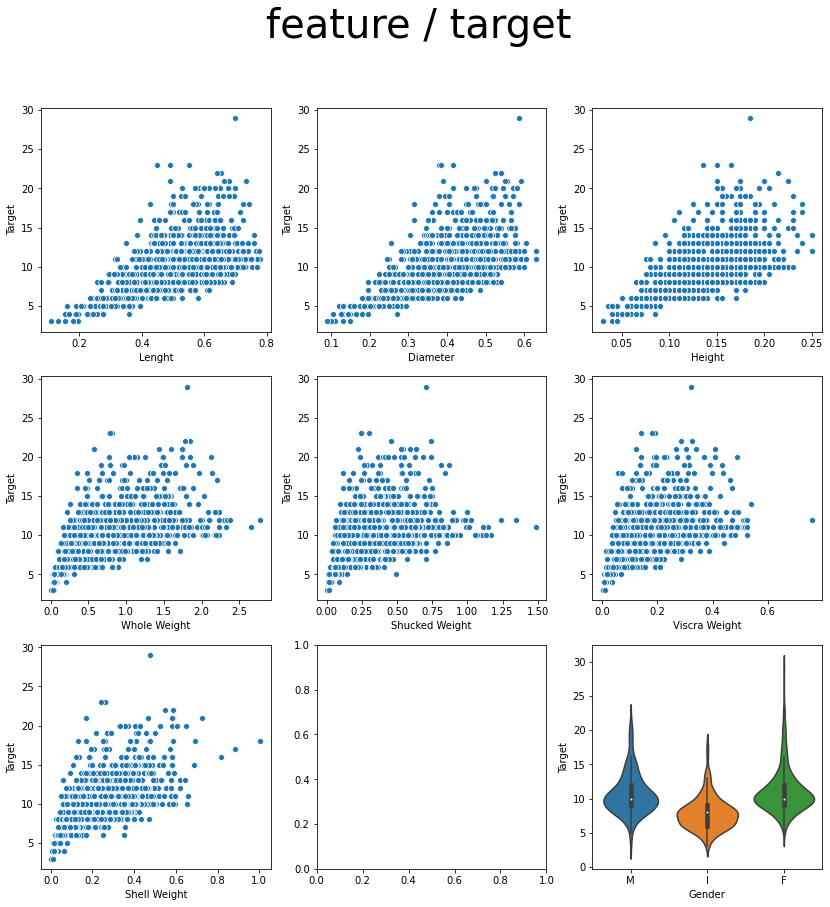

In [50]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / target", fontsize=40)

feature = ["Lenght", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Gender"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        sns.violinplot(x = xstr, y = 'Target', data = raw_data)
    else:
        sns.scatterplot(x = xstr, y = 'Target', data = raw_data, ax = ax[yvalue][xvalue])
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

In [56]:
raw_data[raw_data['Target'] < 15].corr()['Target'].sort_values()

id                0.021897
Shucked Weight    0.501428
Viscra Weight     0.569045
Whole Weight      0.580597
Lenght            0.632798
Shell Weight      0.645145
Diameter          0.647356
Height            0.656581
Target            1.000000
Name: Target, dtype: float64

In [55]:
raw_data[raw_data['Target'] > 15].corr()['Target'].sort_values()

Shell Weight      0.105753
Viscra Weight     0.121283
Height            0.136259
id                0.141966
Lenght            0.186275
Shucked Weight    0.190701
Whole Weight      0.201559
Diameter          0.220429
Target            1.000000
Name: Target, dtype: float64